In [1]:
from train import ProjectAgent
from env_hiv import HIVPatient
from gymnasium.wrappers import TimeLimit
import matplotlib.pyplot as plt

agent = ProjectAgent()
env = TimeLimit(
    env=HIVPatient(domain_randomization=False), max_episode_steps=200
)

In [2]:
env_rand = TimeLimit(
    env=HIVPatient(domain_randomization=True), max_episode_steps=200
)

Episode  1, epsilon   1.00, batch size 1224, ep return  1.5
Episode  2, epsilon   1.00, batch size 1424, ep return  0.8
Episode  3, epsilon   0.98, batch size 1624, ep return  0.9
Episode  4, epsilon   0.96, batch size 1824, ep return  0.8
Episode  5, epsilon   0.94, batch size 2024, ep return  0.9
Episode  6, epsilon   0.92, batch size 2224, ep return  1.1
Episode  7, epsilon   0.90, batch size 2424, ep return  1.1
Episode  8, epsilon   0.88, batch size 2624, ep return  1.1
Episode  9, epsilon   0.86, batch size 2824, ep return  1.7
Episode 10, epsilon   0.84, batch size 3024, ep return  1.0
Episode 11, epsilon   0.82, batch size 3224, ep return  1.1
Episode 12, epsilon   0.80, batch size 3424, ep return  1.3
Episode 13, epsilon   0.78, batch size 3624, ep return  1.1
Episode 14, epsilon   0.76, batch size 3824, ep return  1.4
Episode 15, epsilon   0.74, batch size 4024, ep return  1.9
Episode 16, epsilon   0.72, batch size 4224, ep return  1.7
Episode 17, epsilon   0.70, batch size 4

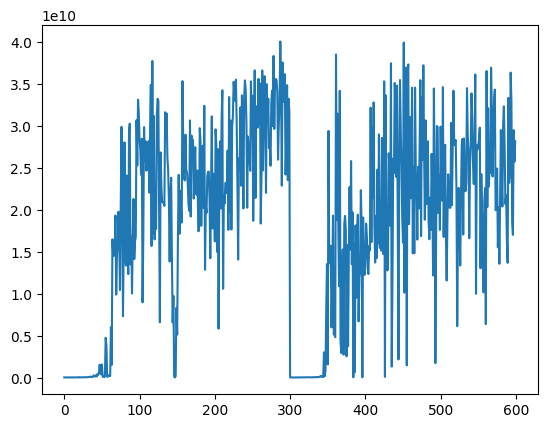

In [3]:
ep_return = agent.bi_train(env, env_rand, 1)
agent.save("model-HIV.pth")
plt.plot(ep_return)

In [2]:
from fast_env import FastHIVPatient

env = TimeLimit(
    env=FastHIVPatient(domain_randomization=False), max_episode_steps=200
)

In [3]:
import os

os.chdir("..")

In [5]:
os.chdir("./src")

In [4]:
agent.load()

In [6]:
from copy import deepcopy

In [7]:
agent.target_model = deepcopy(agent.model).to(agent.device)

Episode  1, epsilon   1.00, batch size 141224, ep return  0.8
Episode  2, epsilon   1.00, batch size 141424, ep return  0.8
Episode  3, epsilon   0.98, batch size 141624, ep return  1.1
Episode  4, epsilon   0.96, batch size 141824, ep return  1.2
Episode  5, epsilon   0.94, batch size 142024, ep return  1.2
Episode  6, epsilon   0.92, batch size 142224, ep return  1.0
Episode  7, epsilon   0.90, batch size 142424, ep return  0.9
Episode  8, epsilon   0.88, batch size 142624, ep return  1.0
Episode  9, epsilon   0.86, batch size 142824, ep return  1.1
Episode 10, epsilon   0.84, batch size 143024, ep return  1.5
Episode 11, epsilon   0.82, batch size 143224, ep return  1.5
Episode 12, epsilon   0.80, batch size 143424, ep return  1.0
Episode 13, epsilon   0.78, batch size 143624, ep return  1.2
Episode 14, epsilon   0.76, batch size 143824, ep return  1.2
Episode 15, epsilon   0.74, batch size 144024, ep return  1.8
Episode 16, epsilon   0.72, batch size 144224, ep return  1.6
Episode 

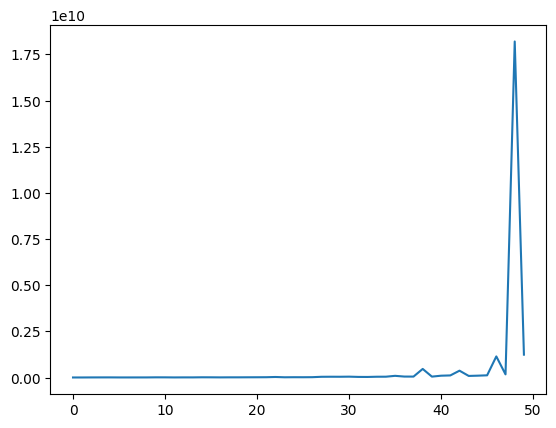

In [9]:
ep_return = agent.train(env, 50)
agent.save("model-HIV.pth")
plt.plot(ep_return)

In [41]:
data = agent.memory.data

In [43]:
import pickle

# Save the list to a file
with open('replay_buffer.pkl', 'wb') as file:
    pickle.dump(data, file)

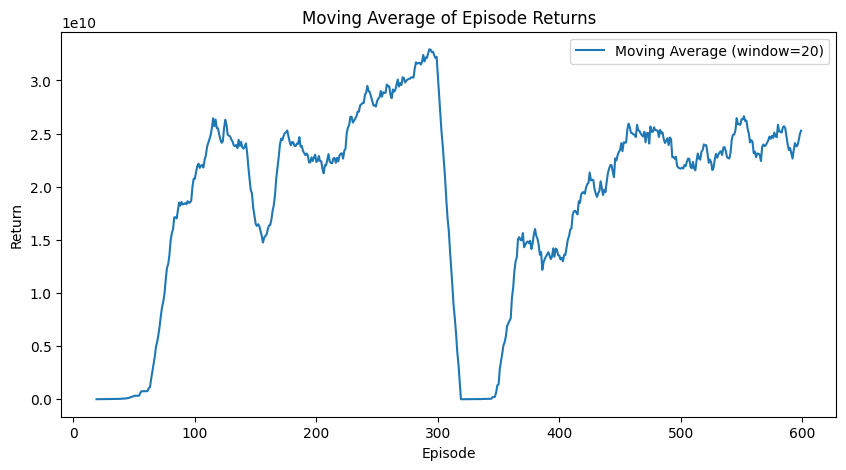

In [4]:
import pandas as pd

# Convert ep_return to a pandas Series
ep_return_series = pd.Series(ep_return)

# Calculate the moving average with a window size of 50
win = 20
moving_average = ep_return_series.rolling(window=win).mean()

# Plot the moving average
plt.figure(figsize=(10, 5))
plt.plot(moving_average, label=f'Moving Average (window={win})')
plt.xlabel('Episode')
plt.ylabel('Return')
plt.title('Moving Average of Episode Returns')
plt.legend()
plt.show()

In [7]:
obs, info = env.reset()
done = False
truncated = False
episode_reward = 0
while not done and not truncated:
    action = agent.act(obs)
    print(action, end=" ")
    obs, reward, done, truncated, _ = env.step(action)
    episode_reward += reward
print("\n",episode_reward)

1 3 0 3 2 1 1 3 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 0 2 3 2 1 0 2 2 1 3 2 2 2 2 2 3 2 3 2 3 3 3 2 3 3 3 3 3 2 3 3 3 3 2 3 3 2 3 2 2 2 2 2 1 3 2 1 3 2 1 3 1 3 1 3 1 2 1 2 1 1 2 1 1 0 3 1 1 1 1 2 1 1 2 1 1 2 1 1 2 0 2 1 1 1 1 1 0 1 0 0 2 0 1 1 2 1 1 2 0 2 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 31880834975.06211


In [5]:
from evaluate import evaluate_HIV, evaluate_HIV_population

score_agent: float = evaluate_HIV(agent=agent, nb_episode=5)
score_agent_dr: float = evaluate_HIV_population(agent=agent, nb_episode=20)
print(f"Score agent: {score_agent*1e-7}")
print(f"Score agent with domain randomization: {score_agent_dr*1e-7}")
with open(file="score.txt", mode="w") as f:
            f.write(f"{score_agent}\n{score_agent_dr}")

Score agent: 3858.104892156977
Score agent with domain randomization: 3340.998354149018


In [12]:
from grading import test_expected_result_one_env_3432807, test_expected_result_one_env_1e8, test_expected_result_one_env_1e9, test_expected_result_one_env_1e10, test_expected_result_one_env_2e10, test_expected_result_one_env_5e10
from grading import test_expected_result_dr_env_1e10, test_expected_result_dr_env_2e10, test_expected_result_dr_env_5e10

test_expected_result_one_env_3432807()
print("1", end=" ")
test_expected_result_one_env_1e8()
print("2", end=" ")
test_expected_result_one_env_1e9()
print("3", end=" ")
test_expected_result_one_env_1e10()
print("4", end=" ")
test_expected_result_one_env_2e10()
print("5", end=" ")
test_expected_result_one_env_5e10()
print("6", end=" ")
test_expected_result_dr_env_1e10()
print("7", end=" ")
test_expected_result_dr_env_2e10()
print("8", end=" ")
test_expected_result_dr_env_5e10()
print("9", end=" ")

1 2 3 4 5 

AssertionError: 